<a href="https://colab.research.google.com/github/Nikhilesh-075/6thSem-ML-Lab/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reduced data shape: (150, 2)


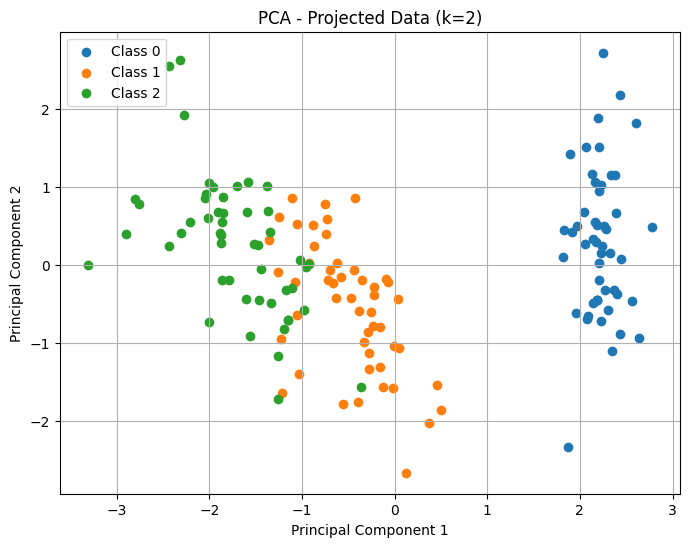

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

# Step 1: Load dataset D with data points x_i ∈ ℝ^d
def load_iris_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    raw_data = urlopen(url)
    data = []
    labels = []
    class_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    for line in raw_data:
        parts = line.decode('utf-8').strip().split(',')
        if len(parts) == 5:
            features = list(map(float, parts[:4]))
            label = class_map[parts[4]]
            data.append(features)
            labels.append(label)
    return np.array(data), np.array(labels)

X, y = load_iris_data()
N, d = X.shape  # Number of samples and features

# Step 2a: Handle missing values (simple approach: remove rows with NaN)
X = X[~np.isnan(X).any(axis=1)]

# Step 2b: Standardize the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_standardized = (X - mean) / std  # x_j' = (x_j - μ_j) / σ_j

# Step 3: Compute covariance matrix Σ = (1 / N) * X^T * X
cov_matrix = (1 / N) * np.dot(X_standardized.T, X_standardized)

# Step 4: Eigenvalue decomposition: Σ * v = λ * v
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # Since covariance matrix is symmetric

# Step 5: Sort eigenvalues (descending) and select top k eigenvectors
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

k = 2  # Choose target dimensionality
V = eigenvectors[:, :k]  # Top-k eigenvectors

# Step 6: Project the data
X_reduced = np.dot(X_standardized, V)

# Step 7a: Output transformed dataset
print("Reduced data shape:", X_reduced.shape)

# Step 7b: Visualize if k = 2
plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(X_reduced[y == label, 0], X_reduced[y == label, 1], label=f"Class {label}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Projected Data (k=2)")
plt.legend()
plt.grid(True)
plt.show()